In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [57]:
df=pd.read_csv('/content/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


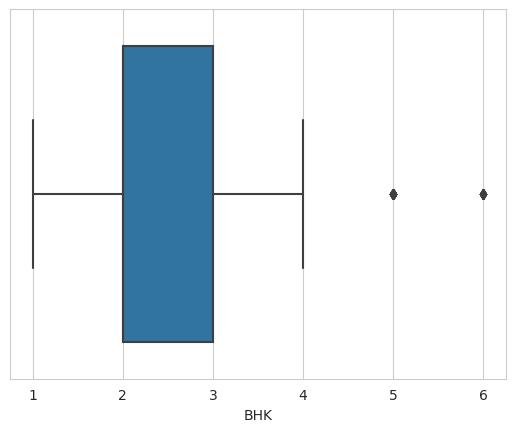

In [58]:
sns.boxplot(x=df['BHK'])
plt.show()

In [59]:
# Calculate the upper and lower limits
Q1 = df['BHK'].quantile(0.25)
Q3 = df['BHK'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [60]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['BHK']>=upper)[0]
lower_array = np.where(df['BHK']<=lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (4719, 12)


In [61]:
import numpy as np
import pandas as pd

# Assuming you have a DataFrame named 'df' with a 'Size' column containing the feature values

# Calculate the mean and standard deviation of 'Size'
mean_size = df['Size'].mean()
std_size = df['Size'].std()

# Set the threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Calculate the upper and lower bounds for outlier detection
upper = mean_size + threshold * std_size
lower = mean_size - threshold * std_size

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Size'] >= upper)[0]
lower_array = np.where(df['Size'] <= lower)[0]

# Check if the indices exist in the DataFrame before dropping
if len(upper_array) > 0:
    df.drop(index=df.index[upper_array], inplace=True)
if len(lower_array) > 0:
    df.drop(index=df.index[lower_array], inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (4636, 12)


In [62]:
# Calculate the mean and standard deviation of 'Size'
mean_size = df['Bathroom'].mean()
std_size = df['Bathroom'].std()

# Set the threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Calculate the upper and lower bounds for outlier detection
upper = mean_size + threshold * std_size
lower = mean_size - threshold * std_size

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Bathroom'] >= upper)[0]
lower_array = np.where(df['Bathroom'] <= lower)[0]

# Check if the indices exist in the DataFrame before dropping
if len(upper_array) > 0:
    df.drop(index=df.index[upper_array], inplace=True)
if len(lower_array) > 0:
    df.drop(index=df.index[lower_array], inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (4603, 12)


In [63]:
[(df.columns[i], df.iloc[:, i].unique().shape[0]) for i in range(len(df.columns))]

[('Posted On', 81),
 ('BHK', 4),
 ('Rent', 231),
 ('Size', 561),
 ('Floor', 449),
 ('Area Type', 3),
 ('Area Locality', 2183),
 ('City', 6),
 ('Furnishing Status', 3),
 ('Tenant Preferred', 3),
 ('Bathroom', 4),
 ('Point of Contact', 3)]

In [64]:
df.drop(columns='Area Locality', inplace=True)
df["Total Floors"] = df["Floor"].apply(lambda floor:floor.split()[-1])
df["Floor"] = df["Floor"].apply(lambda floor:floor.split()[0])
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,Ground,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


In [65]:
df1 = df.select_dtypes('O')
[print(df1.iloc[:, i].unique(), '\n') for i in range(len(df1.columns))]

encodes = {"Floor":     {"Ground": 0, "Upper": 999, "Lower": -1},
           "Total Floors": {"Ground": 0}}

df2 = df.replace(encodes)
df2.head()

['2022-05-18' '2022-05-13' '2022-05-16' '2022-07-04' '2022-05-09'
 '2022-04-29' '2022-06-21' '2022-06-07' '2022-06-20' '2022-05-23'
 '2022-05-14' '2022-05-05' '2022-06-01' '2022-05-17' '2022-06-09'
 '2022-07-02' '2022-06-14' '2022-06-15' '2022-05-28' '2022-05-22'
 '2022-06-18' '2022-06-25' '2022-06-22' '2022-05-21' '2022-06-26'
 '2022-06-16' '2022-06-29' '2022-05-10' '2022-05-12' '2022-06-03'
 '2022-05-31' '2022-06-10' '2022-06-24' '2022-04-30' '2022-05-27'
 '2022-06-06' '2022-05-20' '2022-05-26' '2022-07-03' '2022-04-23'
 '2022-06-19' '2022-07-06' '2022-06-04' '2022-05-30' '2022-06-08'
 '2022-05-03' '2022-05-07' '2022-06-27' '2022-05-15' '2022-04-28'
 '2022-06-28' '2022-06-23' '2022-06-13' '2022-05-04' '2022-04-25'
 '2022-05-06' '2022-06-30' '2022-07-01' '2022-06-17' '2022-06-11'
 '2022-05-11' '2022-06-12' '2022-06-05' '2022-05-25' '2022-05-24'
 '2022-05-19' '2022-04-24' '2022-04-27' '2022-05-08' '2022-04-26'
 '2022-06-02' '2022-05-29' '2022-07-07' '2022-07-08' '2022-07-09'
 '2022-07-

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


In [66]:
Tot_fl = df2['Total Floors'].astype(int).sort_values()
print(Tot_fl)

2883     0
1822     1
3653     1
420      1
418      1
        ..
1055    77
1208    77
579     78
1425    85
601     89
Name: Total Floors, Length: 4603, dtype: int64


In [67]:
df2["Floor"] = df2["Floor"].astype(int)
df2.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                 int64
Area Type            object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
Total Floors         object
dtype: object

In [68]:
X = df2.drop(columns=["Rent","Area Type","Tenant Preferred","Point of Contact","Floor", "Total Floors"])
Y = df["Rent"]

In [69]:
X

,Posted On,BHK,Size,City,Furnishing Status,Bathroom
0,2022-05-18,2,1100,Kolkata,Unfurnished,2
1,2022-05-13,2,800,Kolkata,Semi-Furnished,1
2,2022-05-16,2,1000,Kolkata,Semi-Furnished,1
3,2022-07-04,2,800,Kolkata,Unfurnished,1
4,2022-05-09,2,850,Kolkata,Unfurnished,1
...,...,...,...,...,...,...
4741,2022-05-18,2,1000,Hyderabad,Semi-Furnished,2
4742,2022-05-15,3,2000,Hyderabad,Semi-Furnished,3
4743,2022-07-10,3,1750,Hyderabad,Semi-Furnished,3
4744,2022-07-06,3,1500,Hyderabad,Semi-Furnished,2


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

# Select numeric columns
n_cols = X.select_dtypes(include=['int64', 'float']).columns
n_index = [X.columns.get_loc(col) for col in n_cols]

# Select categorical columns
c_cols = X.select_dtypes(include=['object']).columns
c_index = [X.columns.get_loc(col) for col in c_cols]

# Define numeric transformer pipeline with feature scaling
n_transform = Pipeline(steps=[
    ('imputeN', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

# Define categorical transformer pipeline
c_transform = Pipeline(steps=[
    ('imputeC', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

# Define column transformer with numeric and categorical transformers
pre = ColumnTransformer(transformers=[
    ('numeric', n_transform, n_index),
    ('categorical', c_transform, c_index)
])

# Define Random Forest Regressor estimator
estimator_RF = RandomForestRegressor(n_estimators=190, n_jobs=-1)

# Create the pipeline model with preprocessing and Random Forest Regressor
pipelinemodel_RF = Pipeline(steps=[
    ('processing', pre),
    ('est', estimator_RF)
])

# Fit the pipeline model on the training data
pipelinemodel_RF.fit(X_train, y_train)

# Perform prediction using the pipeline model
y_pred_RF = pipelinemodel_RF.predict(X_test)

# Evaluate the model (e.g., calculate R^2 and RMSE)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred_RF)
rmse = mean_squared_error(y_test, y_pred_RF, squared=False)

print("R^2 Score:", r2)
print("RMSE:", rmse)

R^2 Score: 0.6959014674031574
RMSE: 20225.640751598956


In [71]:
pipelinemodel_RF.score(X_train,y_train)

0.8793728516667761

In [72]:
pipelinemodel_RF.score(X_test,y_test)

0.6959014674031574

#Data Analysis


In [73]:
import plotly.express as px
import plotly.graph_objects as go

#Importing Model


In [74]:
import pickle
pickle.dump(pipelinemodel_RF, open('rent_model.pkl','wb'))

In [75]:
import plotly.graph_objects as go

# Sort the DataFrame by Rent in descending order
df_sorted = df.sort_values(by='Rent', ascending=False)

# Create the bar plot using graph_objects
figure = go.Figure()

for bhk, color in zip(df_sorted["BHK"].unique(), px.colors.qualitative.Pastel):
    df_bhk = df_sorted[df_sorted["BHK"] == bhk]
    figure.add_trace(go.Bar(
        x=df_bhk["City"],
        y=df_bhk["Rent"],
        name=f"{bhk} BHK",
        marker_color=color
    ))

# Update layout
figure.update_layout(
    title="Rent in Different Cities According to BHK",
    xaxis_title="City",
    yaxis_title="Rent",
    title_x=0.5,
    title_y=0.95,
    xaxis_showgrid=True,
    yaxis_showgrid=True,
)

# Show the plot
figure.show()


In [76]:
figure = px.bar(df, x=df["City"],
                y = df["Rent"],
                color = df["BHK"],
            title="Rent in Different Cities According to BHK")
figure.show()

In [77]:
figure = px.bar(df, x=df["City"],
                y = df["Rent"],
                color = df["Size"],
            title="Rent in Different Cities According to Size")
figure.show()

In [78]:
cities = df["City"].value_counts()
label = cities.index
counts = cities.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts, hole=0.5)])
fig.update_layout(title_text='Number of Houses Available for Rent in different Cities')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=3)))
fig.show()

In [79]:
sns.set_style('whitegrid')

colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']


fig = px.pie(df, names='BHK', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of BHKs present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

In [80]:

fig = px.scatter(df, x='Size', y='Rent', color='BHK', size='Size', hover_data=['Rent'])
fig.update_layout(title='House Rent according to size and BHK of the house',
                  yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()

In [81]:
# Houses available according  to the size
fig = px.histogram(df, x="Size", title='Size Distribution')
fig.show()


In [82]:
fig = px.box(df, x="Size", title='Boxplot for Size')
fig.show()

#Prediction

In [ ]:
# Define function to handle user input and make predictions
def make_prediction(user_input):
    # Convert user input into a DataFrame
    user_input_df = pd.DataFrame([user_input])

    # Perform prediction using the pipeline model
    user_prediction = pipelinemodel_RF.predict(user_input_df)

    return user_prediction

# Collect user input
user_input = {
    'Size': float(input("Enter the value for Size (In Integer): ")),
    'BHK': int(input("Enter the value for BHK (In Integer): ")),
    'Bathroom': int(input("Enter the value for Bathroom (In Integer): ")),
    'City': input("Enter the value for City (In string): "),
    'Posted On': input("Enter the value for Posted On (DD/MM/YY): "),
    'Furnishing Status': input("Enter the value for Furnishing Status (In string): ")
}

# Make prediction based on user input
prediction = make_prediction(user_input)

# Print the prediction
print("Prediction:", prediction)